Import libraries

In [3]:
import pandas as pd

Read the CSV

In [4]:
df = pd.read_csv('covid_19_data.csv')
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
626,627,02/02/2020,"Tempe, AZ",US,2020-02-01T19:43:03,1.0,0.0,0.0
2334,2335,02/25/2020,From Diamond Princess,Australia,2020-02-22T17:03:05,7.0,0.0,0.0
893,894,02/06/2020,NaN,Cambodia,2020-01-31T08:15:53,1.0,0.0,0.0
647,648,02/03/2020,Shanxi,Mainland China,2020-02-03T23:13:11,74.0,0.0,2.0
469,470,01/31/2020,NaN,Malaysia,1/31/2020 23:59,8.0,0.0,0.0
1580,1581,02/16/2020,Hebei,Mainland China,2020-02-16T12:03:06,300.0,3.0,105.0
1276,1277,02/12/2020,Chongqing,Mainland China,2020-02-12T23:13:08,518.0,3.0,102.0
103,104,01/24/2020,Heilongjiang,Mainland China,1/24/20 17:00,4.0,1.0,0.0
969,970,02/07/2020,NaN,Nepal,2020-01-31T08:15:53,1.0,0.0,0.0
1292,1293,02/12/2020,Tianjin,Mainland China,2020-02-12T15:03:05,112.0,2.0,11.0


Convert to datetime value

In [5]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

Looking for useful columns

In [6]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [7]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


Group by Date and adding by day

In [8]:
df_time = df.groupby('ObservationDate').sum()
df_time.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


Operations with datetimes

In [9]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [10]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [11]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

Averages per day

In [12]:
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

Deaths per day

In [14]:
df_diff = df_time.diff()

In [16]:
df_time.head(1).to_dict()
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})

In [17]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


In [18]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


Add by months

In [19]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


In [20]:
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,4,4,4


In [21]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,2277.750000,78.250000,2847.250000


### Null variables

In [22]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [23]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,91576.5,3122.5,46915.5
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [24]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']

In [25]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


In [26]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


<AxesSubplot:xlabel='ObservationDate'>

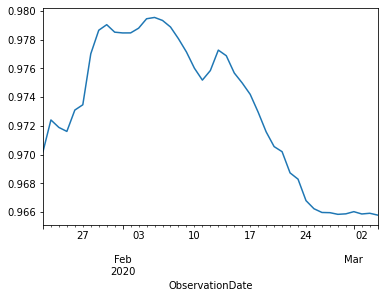

In [27]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

<AxesSubplot:xlabel='ObservationDate'>

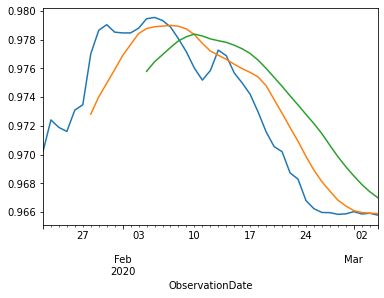

In [28]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

In [29]:
import numpy as np

<AxesSubplot:xlabel='ObservationDate'>

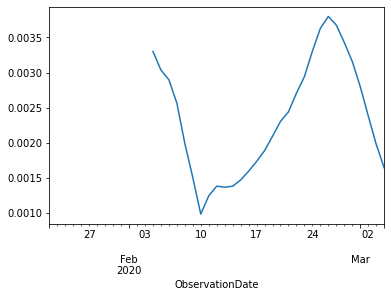

In [30]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

In [31]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Morocco               1.0
Nepal                 1.0
Nigeria               1.0
Latvia                1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [32]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate',freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [34]:
df_china = df_time.loc['Mainland China',:]
df_china.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0


In [35]:
import matplotlib.pyplot as plt

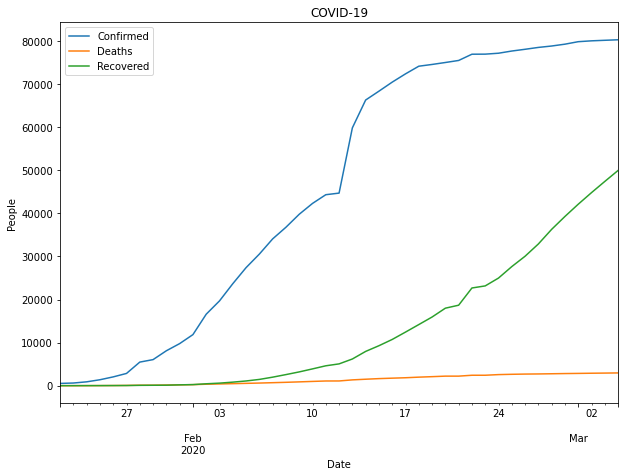

In [37]:
df_china.plot(figsize = (10,7), title = 'COVID-19')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

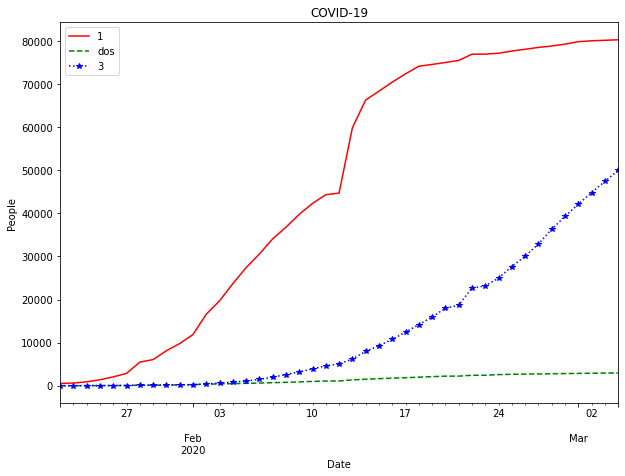

In [38]:
ax = df_china.plot(figsize = (10,7), title = 'COVID-19',
              legend = False,
              style = ['r-','g--','b:*'])
ax.legend(['1','dos','3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [39]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


<AxesSubplot:xlabel='ObservationDate'>

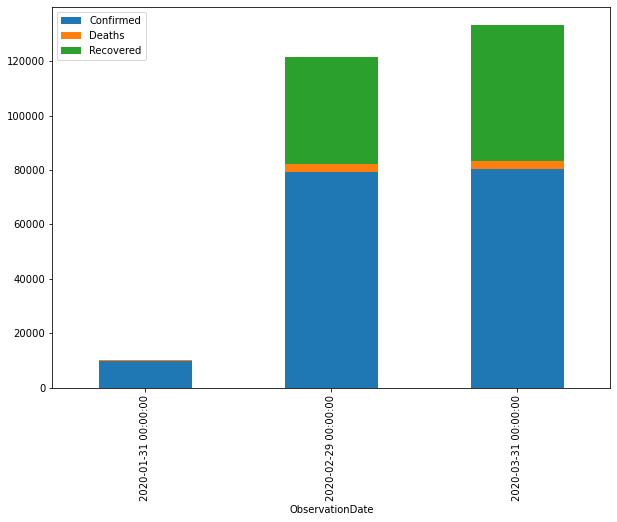

In [40]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked = True)

In [41]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']- df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


array([<AxesSubplot:ylabel='2020-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-02-29 00:00:00'>,
       <AxesSubplot:ylabel='2020-03-31 00:00:00'>], dtype=object)

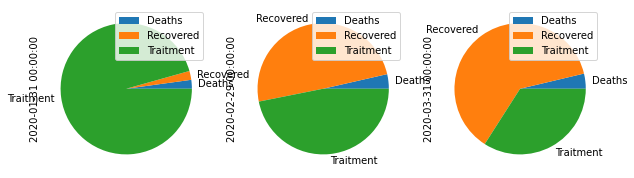

In [42]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize = (10,7), kind = 'pie', subplots=True)

<AxesSubplot:>

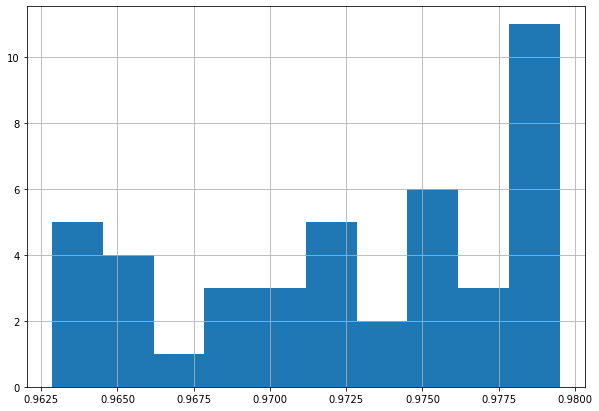

In [43]:
df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']
df_china['rate'].hist(figsize = (10,7), bins = 10)

<AxesSubplot:ylabel='Density'>

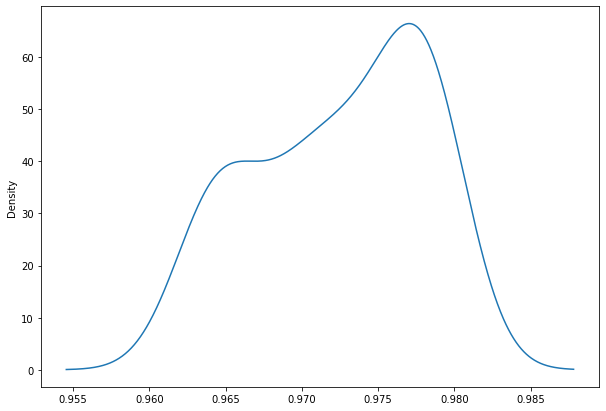

In [44]:
df_china['rate'].plot(kind = 'kde', figsize = (10,7))